# Outline

After reviewing the survey schema and playing with the multiple choice responses in XL, I figured there is a lot to be learned from this dataset about the data scientists population, including, but not limited to, who they are, where they work and what they do, what skills they have, how they learn and how they find work. Below I have outlined the questions that constitute the path I follow in my exploratory analysis.

#### Survey Statistics
- How many survey responders consider themselves data scientists (DS)?

#### Demographics
 - DS population: country, gender, age, academic background?

#### Job Particulars
 - What are DS population job roles? <br>
 - What are the industries DS work in? <br>
 - How experienced are DS? <br>
 - What are DS job functions? <br>
 - What do DS spend their time on? <br>

#### Skills, Tools, Languages
 - What skills do DS possess? <br>
 - What kind of tools do DS use? <br>
 - What programming languages do DS use?

#### Work Environment
 - How satisfied are DS with their job? <br>
 - What challenges do DS face at work?

#### Learning
 - How do DS squire data science skills?

#### Compensation
 - What kind of money do DS make?

#### Job Search
 - How did DS find their job?
 

## Structure

I work through the above questions one-by-one, making use of <b>descriptive statistics</b>, <b>hypothesis testing </b> and <b>data visualisation</b> in attempt to explore each subject from multiple angles. To show my thought process, I include the following in each section of the analysis: <br>
1. the question of interest,
2. data to be used + method of inquiry,
3. code + visualizations,
4. findings + interpretation.

I conclude the analysis with the summary of what I learned.

## Let's get it started!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
# we will be using pandas library to handle the data in the data frame object
import pandas as pd

# load multiple choice responses in data frame mcresp, free form responses - in data frame ffresp
mcresp = pd.read_csv("multipleChoiceResponses.csv", encoding="ISO-8859-1", low_memory = False)
ffresp = pd.read_csv("freeformResponses.csv", encoding="ISO-8859-1", low_memory = False)
# encoding is required, as by default the method is "utf-8" and it doesn't recognize certain characters
# without low_memory setting python generates warning about mixed types in certain columns

print("ffresp df shape: ", ffresp.shape)
print("mcresp df shape: ", mcresp.shape)

('ffresp df shape: ', (16716, 62))
('mcresp df shape: ', (16716, 228))


### Survey Statistics
<b>Question(s)</b>: 
- How many survey responders consider themselves data scientists (DS)? <br>

<b>Relevant data: </b> 'DataScienceIdentitySelect', 'CurrentJobTitleSelect' <br>
<b>Method of Inqury:</b> partition dataset into: self-proclaimed DS, professional DS, and others; count values and present information in a pie chart.

In [181]:
dsselfresp = mcresp[mcresp['DataScienceIdentitySelect']=='Yes']
dsprofresp = mcresp[mcresp['CurrentJobTitleSelect']=='Data Scientist']
dsresp = pd.concat([mcresp[mcresp['DataScienceIdentitySelect']=='Yes'], \
                   mcresp[mcresp['CurrentJobTitleSelect']=='Data Scientist']])

print 'Total Survey Responders:', mcresp.shape[0]
print 'Responders that self-identify as data scientists:', dsselfresp.shape[0]
print '# of responders that hold ds job title:', dsprofresp.shape[0]

if mcresp[(mcresp['DataScienceIdentitySelect']=='Yes') & (mcresp['CurrentJobTitleSelect']=='Data Scientist')].shape[0] == 0:
    print 'check: 2 previous groups do not overlap.'

print 'Total # of self-proclaimed + professional data scientists:', dsresp.shape[0]

Total Survey Responders: 16716
Responders that self-identify as data scientists: 4257
# of responders that hold ds job title: 2433
check: 2 previous groups do not overlap.
Total # of self-proclaimed + professional data scientists: 6690


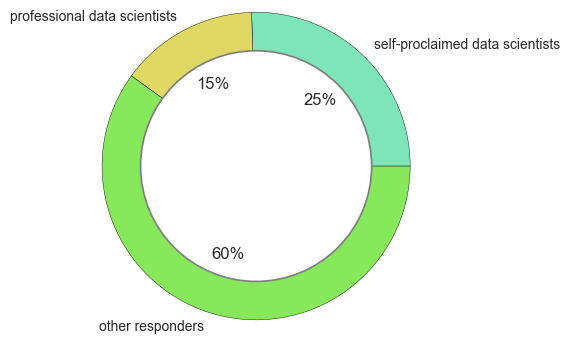

In [196]:
sizes = np.array([dsselfresp.shape[0], dsprofresp.shape[0], mcresp.shape[0] - dsresp.shape[0]])
labels=('self-proclaimed data scientists', 'professional data scientists', 'other responders')
colors=["#7de5b8","#dfd862","#87e85b"]
# color palletes: http://tools.medialab.sciences-po.fr/iwanthue/

fig = plt.figure(figsize=(4,4))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.f%%',
    shadow=False
    )

centre_circle = plt.Circle((0,0),0.75,color='gray', fc='white',linewidth=1.25)
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

<b>Findings:</b> Overall, 40% of survey responders are either self-proclaimed (25%) or professional (15%) data scientists.

### Demographics
<b>Question(s)</b>: 
 - DS population: country, gender, age, academic background?
 
<b>Relevant data: </b> <br>
<b>Method of Inqury:</b>

In [ ]:
# academic background
agef,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

# age
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50,edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show()

In [ ]:
# formal education, employment status

f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

<b>Findings:</b> 

### Job Particulars
<b>Question(s)</b>: 
 - What are DS job roles? <br>
 - What are the industries DS work in? <br>
 - How experienced are DS? <br>
 - What are DS job functions? <br>
 - What do DS spend their time on? <br>
 
<b>Relevant data: </b> <br>
<b>Method of Inqury:</b>

In [ ]:
# What do DS spend their time on?
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

<b>Findings:</b> 

### Skills, Tools, Languages
<b>Question(s)</b>: 
 - What skills do DS possess? <br>
 - What kind of tools do DS use? <br>
 - What programming languages do DS use?
 
<b>Relevant data: </b> <br>
<b>Method of Inqury:</b>

In [ ]:
# What programming languages do DS use?
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

<b>Findings:</b> 

### Work Environment
<b>Question(s)</b>: 
 - How satisfied are DS with their job? <br>
 - What challenges do DS face at work?
 
<b>Relevant data: </b> <br>
<b>Method of Inqury:</b>

In [ ]:
# What challenges do DS face at work?
plt.subplots(figsize=(15,15))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
pd.Series(challenges).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',25))
plt.title('Challenges in Data Science')
plt.show()

In [ ]:
# How satisfied are DS with their job? 
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()
ax=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',20))
fig=plt.gcf()
fig.set_size_inches(8,10)
for i, v in enumerate(satisfy_job.JobSatisfaction): 
    ax.text(.1, i, v,fontsize=10,color='white',weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

<b>Findings:</b> 

### Learning
<b>Question(s)</b>: 
 - How do DS squire data science skills?
 
<b>Relevant data: </b> <br>
<b>Method of Inqury:</b>

<b>Findings:</b> 

### Compensation
<b>Question(s)</b>: 
 - What kind of money do DS make?
 
 
<b>Relevant data: </b> <br>
<b>Method of Inqury:</b>

In [ ]:
#  What kind of money do DS make?
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
rates=pd.read_csv('../input/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

In [ ]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

<b>Findings:</b> 

### Job Search
<b>Question(s)</b>: 
 - How did DS find their last job?
 
 
<b>Relevant data: </b> <br>
<b>Method of Inqury:</b>

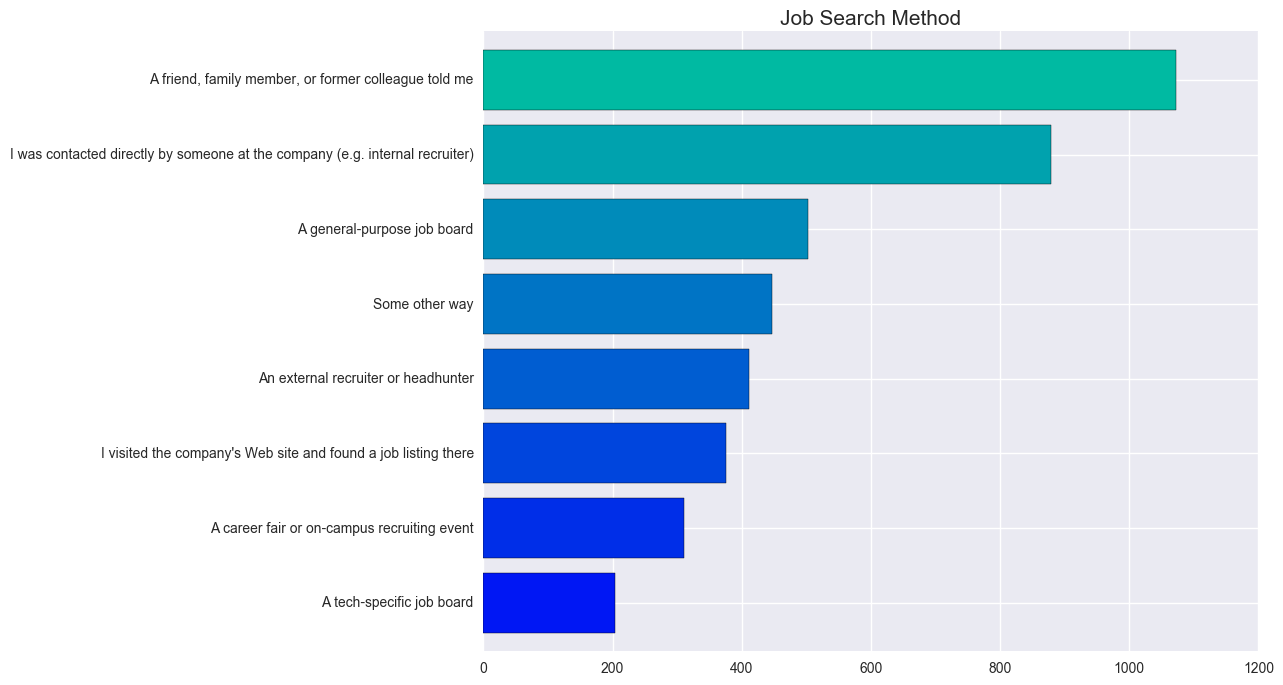

In [198]:
# How did DS find their last job?
plt.subplots(figsize=(10,8))
dsresp.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.title('Job Search Method',size=15)
plt.ylabel('')
plt.show()

<b>Findings:</b> 

## Final Remarks